In [0]:
!pip install imgaug
!apt-get -qq install -y libsm6 libxext6 && pip install -q -U opencv-python


In [0]:
!pip install -q keras

In [0]:

import pandas as pd
import numpy as np
import os
import keras
import matplotlib.pyplot as plt
from keras.layers import Dense,GlobalAveragePooling2D, Dropout, Convolution2D
from keras.applications import MobileNet
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.optimizers import Adam


In [0]:
#_URL = 'https://www.kaggle.com/slothkong/10-monkey-species/download'

#path_to_zip = tf.keras.utils.get_file('10-monkey-species.zip', origin=_URL, extract=True)

#PATH = os.path.join(os.path.dirname(path_to_zip), '10-monkey-species')

PATH = "/content/drive/My Drive/Colab Notebooks/training"
train_dir = "/content/drive/My Drive/Colab Notebooks/training/training"
validation_dir = os.path.join(PATH, 'validation/validation')



In [0]:
base_model=MobileNet(weights='imagenet',include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.

x=base_model.output
x=GlobalAveragePooling2D()(x)

x=Dense(1024,activation='tanh',kernel_regularizer=regularizers.l1_l2(l1=1e-3, l2=1e-2),
    bias_regularizer=regularizers.l2(1e-4),
    activity_regularizer=regularizers.l2(1e-5),kernel_initializer='random_normal',
    bias_initializer='random_normal')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(1024,activation='tanh',kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
    bias_regularizer=regularizers.l2(1e-4),
    activity_regularizer=regularizers.l2(1e-5),kernel_initializer='random_normal',
    bias_initializer='random_normal')(x) #dense layer 2
x=Dropout(0.5)(x)
x=Dense(512,activation='tanh',kernel_regularizer=regularizers.l1_l2(l1=1e-3, l2=1e-2),
    bias_regularizer=regularizers.l2(1e-4),
    activity_regularizer=regularizers.l2(1e-5),kernel_initializer='random_normal',
    bias_initializer='random_normal')(x) #dense layer 3
x=Dropout(0.5)(x)
preds=Dense(10,activation='softmax')(x)

/usr/local/lib/python3.6/dist-packages/keras_applications/mobilenet.py:207: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


In [0]:
model=Model(inputs=base_model.input,outputs=preds)

In [0]:
for layer in model.layers[:20]:
    layer.trainable=False
for layer in model.layers[20:]:
    layer.trainable=True

In [0]:
train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input, validation_split=0.2) #included in our dependencies

train_generator=train_datagen.flow_from_directory(train_dir, # this is where you specify the path to the main data folder
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True,
                                                  subset="training")

val_generator=train_datagen.flow_from_directory(train_dir, # this is where you specify the path to the main data folder
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True, 
                                                 subset="validation")

Found 881 images belonging to 10 classes.
Found 217 images belonging to 10 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


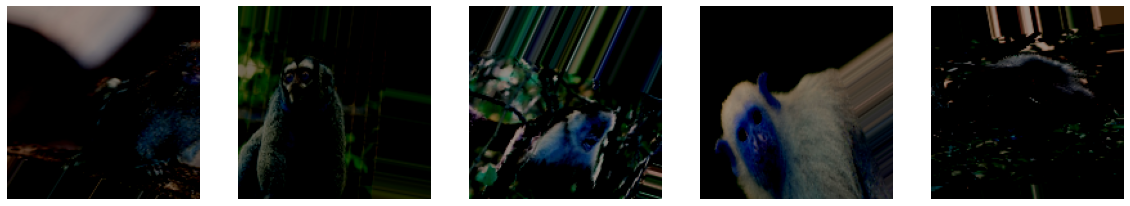

In [0]:

import matplotlib.pyplot as plt


def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    
    plt.show()

plotImages(sample_training_images[:5])


In [0]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Adam optimizer
# loss function will be categorical cross entropy
# evaluation metric will be accuracy

step_size_train=train_generator.n//train_generator.batch_size
step_size_val=val_generator.n//val_generator.batch_size
history=model.fit_generator(train_generator,
                   steps_per_epoch=step_size_train,
                   epochs=7, 
                    validation_data=val_generator,
                    validation_steps=step_size_val)



Epoch 1/7
27/27 [==============================] - 34s 1s/step - loss: 11.0732 - accuracy: 0.9234 - val_loss: 11.8327 - val_accuracy: 0.3333
Epoch 2/7
27/27 [==============================] - 30s 1s/step - loss: 6.5566 - accuracy: 0.9458 - val_loss: 8.0390 - val_accuracy: 0.2865
Epoch 3/7
27/27 [==============================] - 30s 1s/step - loss: 3.6732 - accuracy: 0.9764 - val_loss: 3.2523 - val_accuracy: 0.7676
Epoch 4/7
27/27 [==============================] - 31s 1s/step - loss: 2.2473 - accuracy: 0.9942 - val_loss: 2.3738 - val_accuracy: 0.8270
Epoch 5/7
27/27 [==============================] - 27s 1s/step - loss: 1.7107 - accuracy: 1.0000 - val_loss: 1.9033 - val_accuracy: 0.9568
Epoch 6/7
27/27 [==============================] - 29s 1s/step - loss: 1.4516 - accuracy: 0.9988 - val_loss: 1.4153 - val_accuracy: 0.9297
Epoch 7/7
27/27 [==============================] - 26s 946ms/step - loss: 1.2494 - accuracy: 1.0000 - val_loss: 1.2400 - val_accuracy: 0.9568


In [0]:
test_dir="/content/drive/My Drive/Colab Notebooks/validation/validation"
test_datagen=ImageDataGenerator(preprocessing_function=preprocess_input) #included in our dependencies
test_generator=train_datagen.flow_from_directory(test_dir, # this is where you specify the path to the main data folder
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode="categorical",
                                                 shuffle=True) 

Found 272 images belonging to 10 classes.


In [0]:
step_size_test=test_generator.n//test_generator.batch_size


In [0]:
test_history=model.evaluate_generator(test_generator, 272)

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 4 could not be retrieved. It could be because a worker has died.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 5 could not be retrieved. It could be because a worker has died.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 6 could not be retrieved. It could be because a worker has died.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 7 could not be retrieved. It could be because a worker has died.
  UserWarning)


In [0]:
test_history[1]

0.9816390872001648

In [1]:
!mkdir -p saved_model
model.save('saved_model/my_model') 

NameError: ignored